# Problem Statement - Predicting food donation availability to avoid food wastage

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

In [ ]:
#load the data
df = pd.read_csv('/content/generated_food_donation_data.csv')

# Data preprocessing and understanding the data

In [ ]:
df.head()

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours)
0,Patel-Fisher,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4
1,Mccoy LLC,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3
3,Nelson and Sons,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3
4,Bell Ltd,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Donor Name                         2000 non-null   object 
 1   Food Type                          2000 non-null   object 
 2   Quantity (kg)                      2000 non-null   float64
 3   Location                           2000 non-null   object 
 4   Donation Date                      2000 non-null   object 
 5   Transport Mode                     2000 non-null   object 
 6   Donor Type                         2000 non-null   object 
 7   Donation Frequency (per month)     2000 non-null   int64  
 8   Average Donation Duration (hours)  2000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 140.8+ KB


In [ ]:
df.shape

(2000, 9)

In [ ]:
df.describe()

,Quantity (kg),Donation Frequency (per month),Average Donation Duration (hours)
count,2000.000000,2000.000000,2000.000000
mean,52.045900,5.013000,1.729850
std,27.332196,2.579759,0.717685
min,5.340000,1.000000,0.500000
25%,28.797500,3.000000,1.100000
50%,52.335000,5.000000,1.700000
75%,75.345000,7.000000,2.300000
max,99.970000,9.000000,3.000000


In [ ]:
df.describe(include='all')

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours)
count,2000,2000,2000.000000,2000,2000,2000,2000,2000.000000,2000.000000
unique,1881,9,NaN,1866,365,5,5,NaN,NaN
top,Johnson LLC,Dairy,NaN,East James,2024-06-05,Walk,Grocery Store,NaN,NaN
freq,6,240,NaN,4,13,438,410,NaN,NaN
mean,NaN,NaN,52.045900,NaN,NaN,NaN,NaN,5.013000,1.729850
std,NaN,NaN,27.332196,NaN,NaN,NaN,NaN,2.579759,0.717685
min,NaN,NaN,5.340000,NaN,NaN,NaN,NaN,1.000000,0.500000
25%,NaN,NaN,28.797500,NaN,NaN,NaN,NaN,3.000000,1.100000
50%,NaN,NaN,52.335000,NaN,NaN,NaN,NaN,5.000000,1.700000
75%,NaN,NaN,75.345000,NaN,NaN,NaN,NaN,7.000000,2.300000


In [ ]:
df.isna().sum()

,0
Donor Name,0
Food Type,0
Quantity (kg),0
Location,0
Donation Date,0
Transport Mode,0
Donor Type,0
Donation Frequency (per month),0
Average Donation Duration (hours),0


In [ ]:
df.isnull().sum()

,0
Donor Name,0
Food Type,0
Quantity (kg),0
Location,0
Donation Date,0
Transport Mode,0
Donor Type,0
Donation Frequency (per month),0
Average Donation Duration (hours),0


In [ ]:
#If any null values would have been present, we would have replaced them with
# mean/median - for continous data (depending on skewness and other imp factors)
# mode - for categorical data

In [ ]:
df['Food Type'].value_counts()

,count
Food Type,
Dairy,240
Vegetables,237
Meat,231
Fruits,230
Snacks,225
Bakery,218
Grains,216
Frozen Food,206
Canned Goods,197


In [ ]:
df['Donor Type'].value_counts()

,count
Donor Type,
Grocery Store,410
Restaurant,403
Supermarket,402
Food Bank,393
Farm,392


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Donor Name                         2000 non-null   object 
 1   Food Type                          2000 non-null   object 
 2   Quantity (kg)                      2000 non-null   float64
 3   Location                           2000 non-null   object 
 4   Donation Date                      2000 non-null   object 
 5   Transport Mode                     2000 non-null   object 
 6   Donor Type                         2000 non-null   object 
 7   Donation Frequency (per month)     2000 non-null   int64  
 8   Average Donation Duration (hours)  2000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 140.8+ KB


In [ ]:
df['Transport Mode'].value_counts()

,count
Transport Mode,
Walk,438
Truck,437
Bike,385
Drone,371
Van,369


In [ ]:
df['Location'].value_counts()

,count
Location,
East James,4
West Michael,3
Port James,3
Lake Brian,3
Michaelville,3
...,...
Mannport,1
Patriciastad,1
Lake Bretthaven,1


In [ ]:
df['Donation Date'].value_counts()

,count
Donation Date,
2024-06-05,13
2024-06-01,12
2024-04-18,12
2023-12-23,11
2024-03-10,11
...,...
2024-11-06,1
2024-10-11,1
2024-09-18,1


In [ ]:
#Data type of donation date column is object. We have to convert this into date type format.

In [ ]:
if df['Donation Date'].dtype == 'object':
  # Convert the 'Donation Date' column to datetime objects
  df['Donation Date'] = pd.to_datetime(df['Donation Date'])
  print("\n'Donation Date' column converted to datetime.")
  print(df['Donation Date'].dtype)


'Donation Date' column converted to datetime.
datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Donor Name                         2000 non-null   object        
 1   Food Type                          2000 non-null   object        
 2   Quantity (kg)                      2000 non-null   float64       
 3   Location                           2000 non-null   object        
 4   Donation Date                      2000 non-null   datetime64[ns]
 5   Transport Mode                     2000 non-null   object        
 6   Donor Type                         2000 non-null   object        
 7   Donation Frequency (per month)     2000 non-null   int64         
 8   Average Donation Duration (hours)  2000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 140.8+ KB


In [ ]:
df['Donation Date'].value_counts()

,count
Donation Date,
2024-06-05,13
2024-06-01,12
2024-04-18,12
2023-12-23,11
2024-03-10,11
...,...
2024-11-06,1
2024-10-11,1
2024-09-18,1


# 4. Feature Selection/Engineering

In [ ]:
#Feature Engineering

In [ ]:
df['Donation Date'].dt.year.value_counts()

,count
Donation Date,
2024,1721
2023,279


In [ ]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df['Day of Week'] = df['Donation Date'].dt.dayofweek
# Extract the year
df['Year'] = df['Donation Date'].dt.year
# Extract the month
df['Month'] = df['Donation Date'].dt.month
# Extract the day of the month
df['Day'] = df['Donation Date'].dt.day

In [ ]:
df.head()

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,Patel-Fisher,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4,3,2024,6,6
1,Mccoy LLC,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8,3,2024,1,25
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
3,Nelson and Sons,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3,6,2024,2,25
4,Bell Ltd,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8,1,2024,6,25


# 5. EDA

In [ ]:
df.head()

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,Patel-Fisher,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4,3,2024,6,6
1,Mccoy LLC,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8,3,2024,1,25
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
3,Nelson and Sons,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3,6,2024,2,25
4,Bell Ltd,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8,1,2024,6,25


In [ ]:
df['Donor Name'].nunique()

1881

In [ ]:
top_donors = df.groupby('Donor Name')['Quantity (kg)'].sum()

In [ ]:
top_donors

,Quantity (kg)
Donor Name,
"Abbott, Richardson and White",23.88
"Acevedo, Alvarado and Wood",13.27
"Acevedo, Wallace and Moon",11.71
"Acosta, Casey and Davis",77.29
Adams Inc,24.70
...,...
Zavala-Cook,14.60
Zimmerman Group,35.76
Zimmerman-Hansen,51.04


In [ ]:
top_ten_donors = df.groupby('Donor Name')['Quantity (kg)'].sum().sort_values(ascending=False).head(10)

In [ ]:
top_ten_donors

,Quantity (kg)
Donor Name,
Smith Group,347.15
Johnson Group,304.51
Wilson LLC,290.37
Johnson LLC,289.87
Smith PLC,279.35
Hamilton LLC,248.57
Davis Ltd,240.85
Martinez and Sons,223.73
Perez Ltd,216.69


In [ ]:
top_ten_donors = pd.DataFrame(top_ten_donors)

In [ ]:
top_ten_donors.values

array([[347.15],
       [304.51],
       [290.37],
       [289.87],
       [279.35],
       [248.57],
       [240.85],
       [223.73],
       [216.69],
       [204.27]])

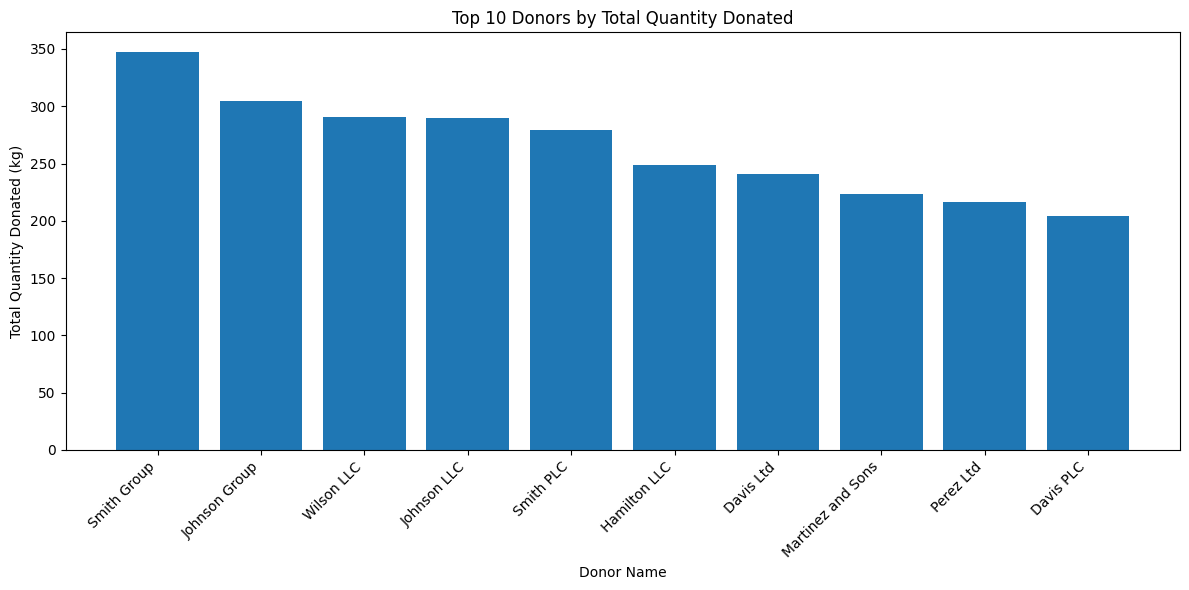

In [ ]:
top_donors = df.groupby('Donor Name')['Quantity (kg)'].sum().sort_values(ascending=False).head(10)
# Visualize the top 10 donors
plt.figure(figsize=(12, 6))
plt.bar(top_donors.index, top_donors.values)
plt.xlabel('Donor Name')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Top 10 Donors by Total Quantity Donated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_ten_food_types = df.groupby('Food Type')['Quantity (kg)'].sum().sort_values(ascending=False).head(10)

In [ ]:
food_types = df.groupby('Food Type')['Quantity (kg)'].sum()

In [ ]:
top_ten_food_types = pd.DataFrame(top_ten_food_types)

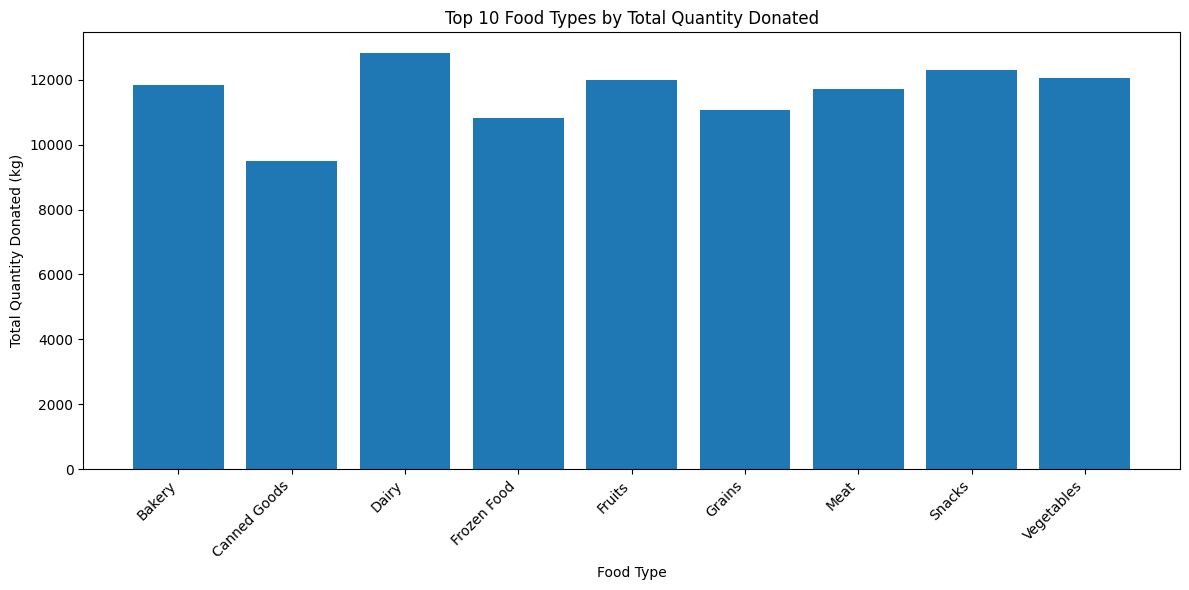

In [ ]:
# Visualize the top 10 donors
plt.figure(figsize=(12, 6))
plt.bar(food_types.index, food_types.values)
plt.xlabel('Food Type')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Top 10 Food Types by Total Quantity Donated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_ten_food_types.values

array([[12819.8 ],
       [12289.18],
       [12043.58],
       [11992.18],
       [11839.29],
       [11726.31],
       [11076.4 ],
       [10807.78],
       [ 9497.28]])

In [ ]:
top_five_locations = df.groupby('Location')['Quantity (kg)'].sum().sort_values(ascending=False).head(10)

In [ ]:
#top_five_locations = pd.DataFrame(top_five_locations)

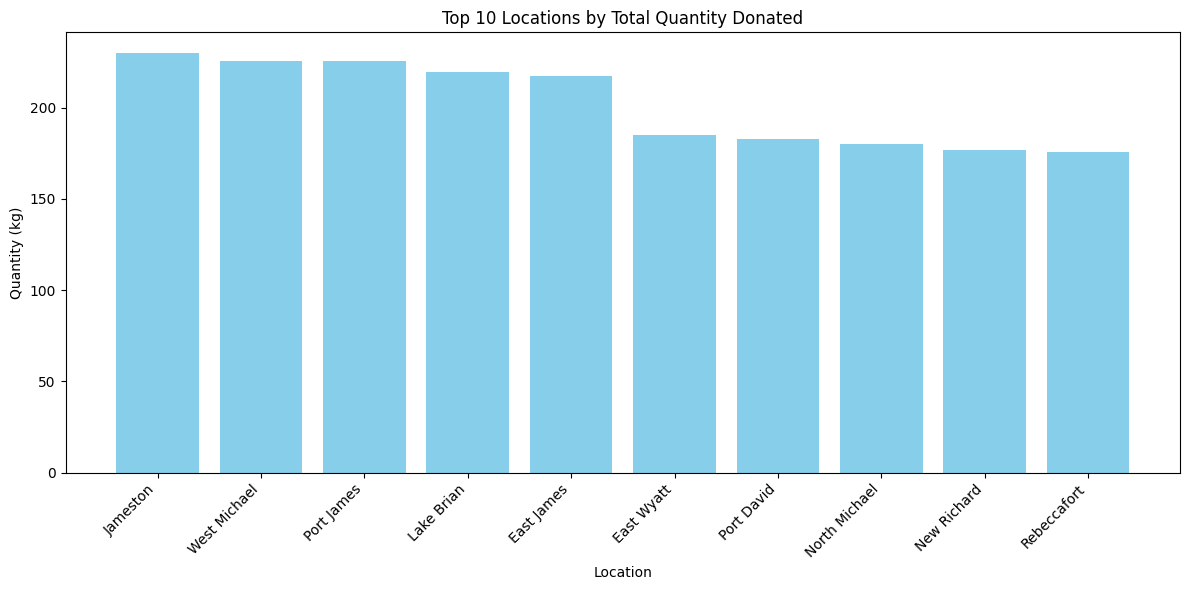

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_five_locations.index, top_five_locations.values, color = 'Skyblue')
plt.xlabel('Location')
plt.ylabel('Quantity (kg)')
plt.title('Top 10 Locations by Total Quantity Donated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_ten_months = df.groupby('Month')['Quantity (kg)'].sum()
top_ten_months

,Quantity (kg)
Month,
1,9332.06
2,8049.47
3,7714.52
4,8974.88
5,7966.85
6,9449.39
7,9119.02
8,8747.48
9,7850.35


In [ ]:

#sorted(df['Donation Date'].dt.month.unique())

In [ ]:
#sorted(df['Month'].unique())

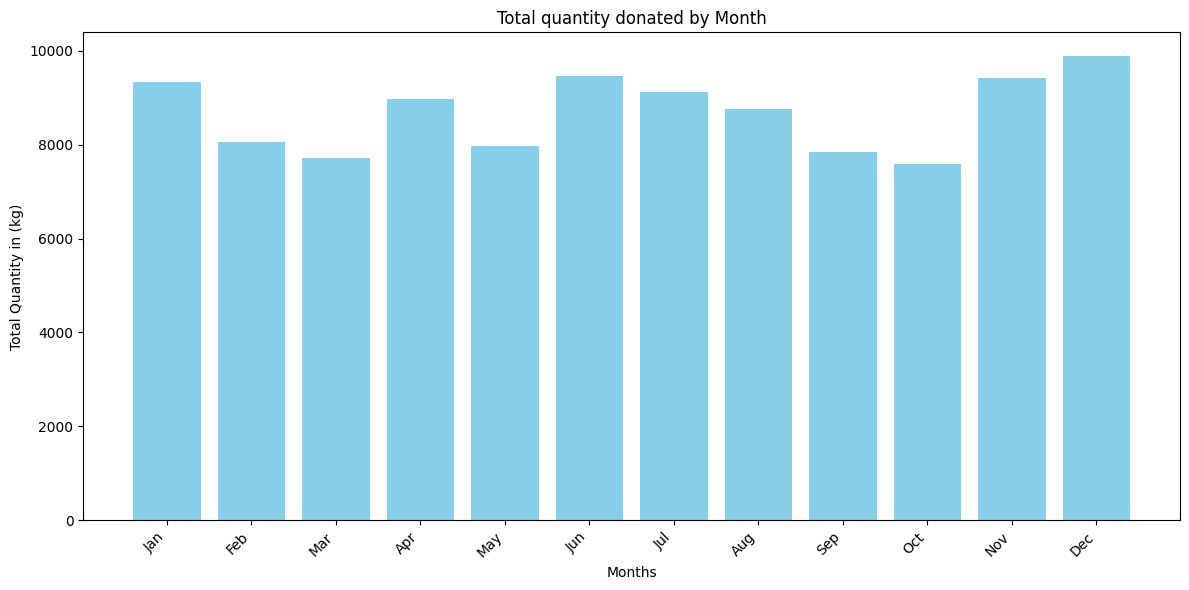

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_ten_months.index, top_ten_months.values, color = 'Skyblue')
plt.xlabel('Months')
plt.ylabel('Total Quantity in (kg)')
plt.title('Total quantity donated by Month')
plt.xticks(rotation=45, ha='right')
plt.xticks(top_ten_months.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
df['Donation Date'].dt.year.unique()

array([2024, 2023], dtype=int32)

In [ ]:
# Exercise for you, visualize month wise data separately for years 2023 and 2024

In [ ]:
df.head

<bound method NDFrame.head of                          Donor Name   Food Type  Quantity (kg)  \
0                      Patel-Fisher       Dairy          38.45   
1                         Mccoy LLC      Grains          39.92   
2                   Peterson-Harris      Grains          41.92   
3                   Nelson and Sons        Meat          40.73   
4                          Bell Ltd      Grains          41.10   
...                             ...         ...            ...   
1995                    Smith Group      Fruits          84.32   
1996     Atkins, Chapman and Rogers  Vegetables           7.01   
1997  Compton, Estrada and Williams      Bakery          24.69   
1998                  Valdez-Morris       Dairy          66.75   
1999                    Alvarez Inc      Grains          43.77   

                 Location Donation Date Transport Mode     Donor Type  \
0             Grahamburgh    2024-06-06          Drone     Restaurant   
1           North Amyberg    2024-01-25          Truck     Restaurant   
2              Carlosport    2023-12-18          Drone     Restaurant   
3          Johnsonchester    2024-02-25           Walk      Food Bank   
4        North Meganmouth    2024-06-25           Walk  Grocery Store   
...                   ...           ...            ...            ...   
1995    East Phillipmouth    2024-01-19           Walk      Food Bank   
1996           Blackhaven    2024-09-17           Walk    Supermarket   
1997          Port Thomas    2023-12-23          Truck    Supermarket   
1998  South Jeanetteburgh    2023-12-09            Van     Restaurant   
1999           North Jill    2024-06-20          Truck      Food Bank   

      Donation Frequency (per month)  Average Donation Duration (hours)  \
0                                  9                                1.4   
1                                  9                                0.8   
2                                  5                                1.3   
3                                  6                                2.3   
4                                  3                                0.8   
...                              ...                                ...   
1995                               9                                2.3   
1996                               1                                1.8   
1997                               6                                1.1   
1998                               3                                2.8   
1999                               1                                2.1   

      Day of Week  Year  Month  Day  
0               3  2024      6    6  
1               3  2024      1   25  
2               0  2023     12   18  
3               6  2024      2   25  
4               1  2024      6   25  
...           ...   ...    ...  ...  
1995            4  2024      1   19  
1996            1  2024      9   17  
1997            5  2023     12   23  
1998            5  2023     12    9  
1999            3  2024      6   20  

[2000 rows x 13 columns]>

In [ ]:
df.head()

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,Patel-Fisher,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4,3,2024,6,6
1,Mccoy LLC,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8,3,2024,1,25
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
3,Nelson and Sons,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3,6,2024,2,25
4,Bell Ltd,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8,1,2024,6,25


In [ ]:
df['Year']

,Year
0,2024
1,2024
2,2023
3,2024
4,2024
...,...
1995,2024
1996,2024
1997,2023
1998,2023


In [ ]:
df_2023 = df[df['Year'] == 2023]

In [ ]:
df_2023

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
14,Huffman PLC,Vegetables,26.20,North Jacobside,2023-12-15,Walk,Food Bank,1,1.8,4,2023,12,15
15,"Allen, Woods and Fisher",Snacks,58.34,Madisonfurt,2023-12-16,Drone,Grocery Store,3,2.7,5,2023,12,16
32,Jones PLC,Frozen Food,97.70,Bethanystad,2023-11-21,Truck,Supermarket,7,1.6,1,2023,11,21
33,Thomas PLC,Vegetables,71.78,Jameschester,2023-12-09,Bike,Grocery Store,1,2.8,5,2023,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,Doyle-Rangel,Grains,27.42,Port Tonya,2023-12-28,Drone,Food Bank,7,2.5,3,2023,12,28
1987,"Jordan, Griffin and Williams",Fruits,39.62,Susanchester,2023-11-22,Walk,Supermarket,7,1.7,2,2023,11,22
1994,Flores-West,Vegetables,22.46,Hollyport,2023-12-21,Bike,Grocery Store,6,1.2,3,2023,12,21
1997,"Compton, Estrada and Williams",Bakery,24.69,Port Thomas,2023-12-23,Truck,Supermarket,6,1.1,5,2023,12,23


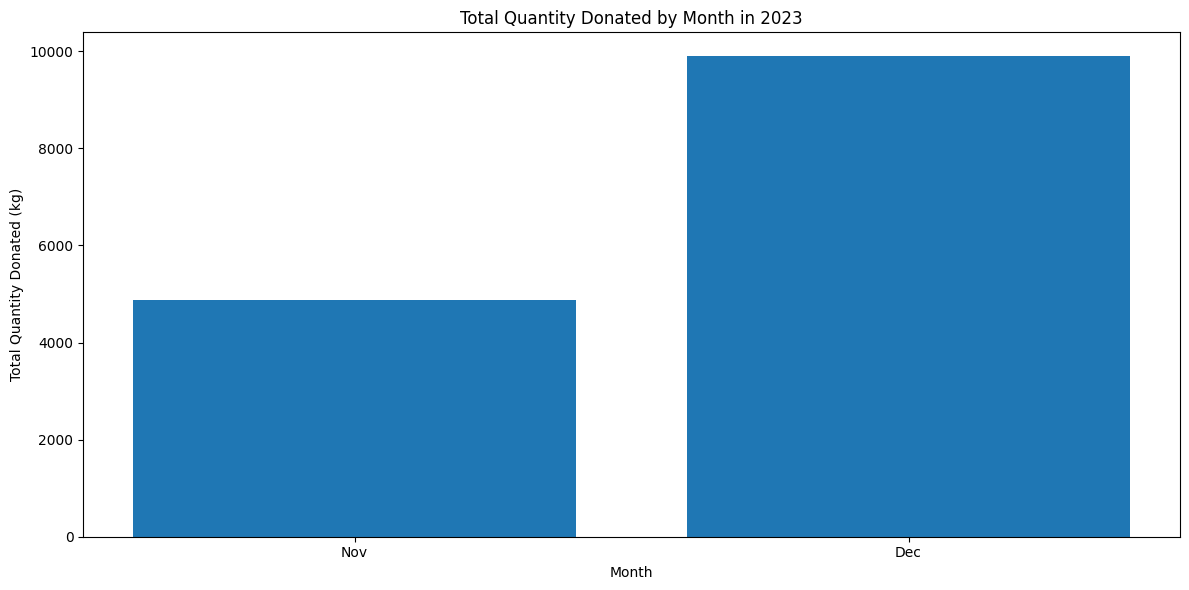

In [ ]:
# Visualize the top months for 2023
monthly_donations_2023 = df_2023.groupby(df_2023['Donation Date'].dt.month)['Quantity (kg)'].sum()
plt.figure(figsize=(12, 6))
plt.bar(monthly_donations_2023.index, monthly_donations_2023.values)
plt.xlabel('Month')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Total Quantity Donated by Month in 2023')
plt.xticks(monthly_donations_2023.index, ['Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
df_2024 = df[df['Year'] == 2024]

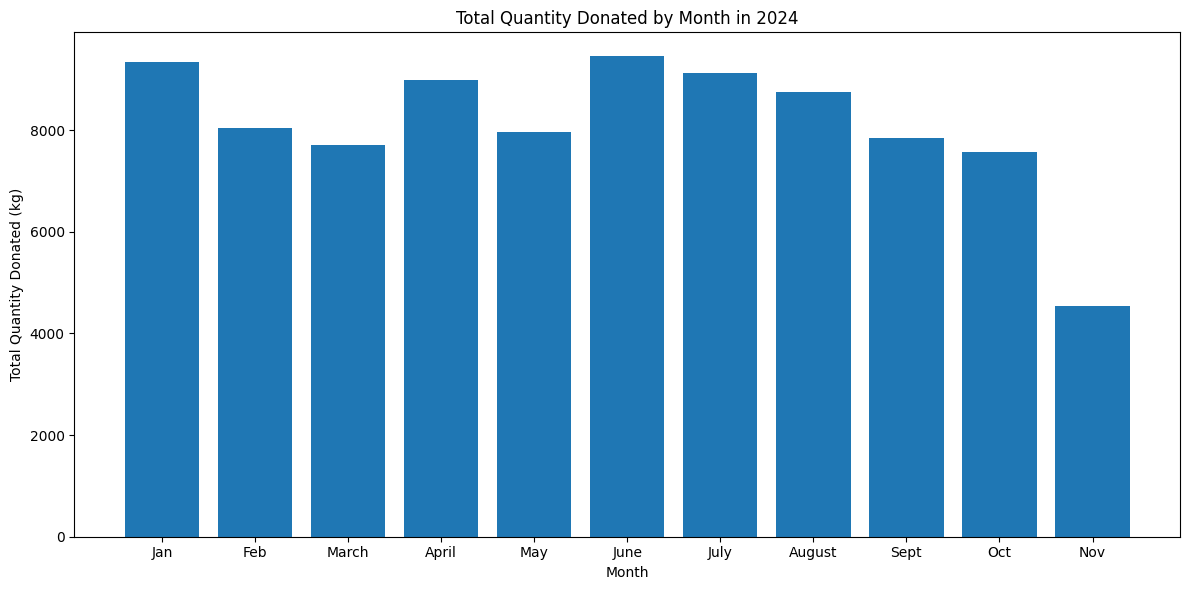

In [ ]:
# Visualize the top months for 2024
monthly_donations_2024 = df_2024.groupby(df_2024['Donation Date'].dt.month)['Quantity (kg)'].sum()
plt.figure(figsize=(12, 6))
plt.bar(monthly_donations_2024.index, monthly_donations_2024.values)
plt.xlabel('Month')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Total Quantity Donated by Month in 2024')
plt.xticks(monthly_donations_2024.index, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov'])
plt.tight_layout()
plt.show()

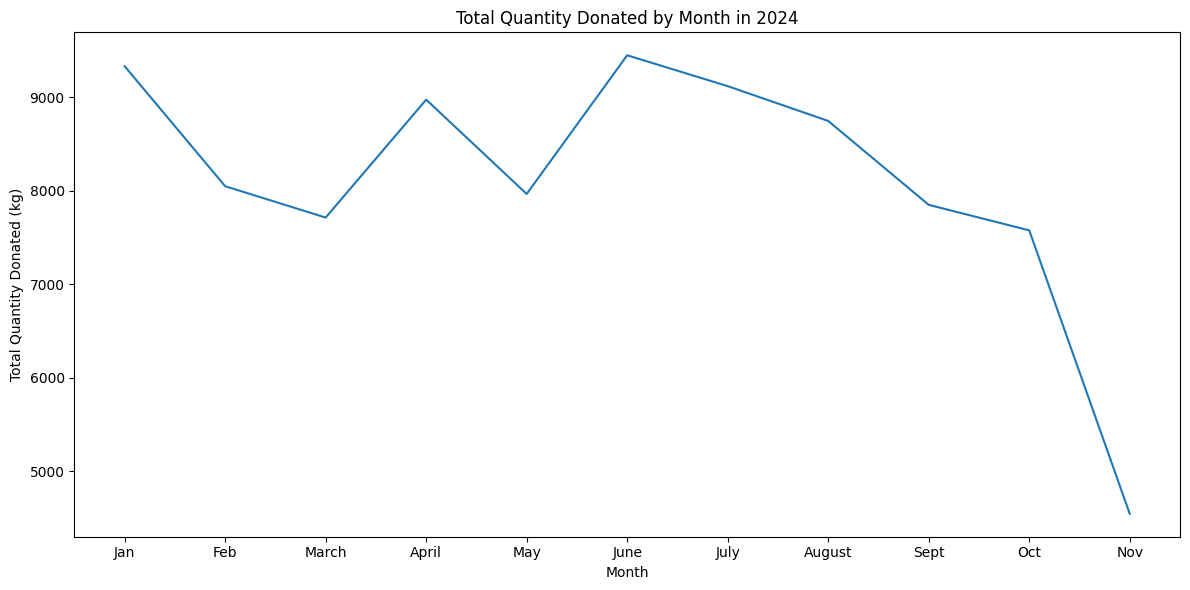

In [ ]:
# Visualize the top months for 2024
monthly_donations_2024 = df_2024.groupby(df_2024['Donation Date'].dt.month)['Quantity (kg)'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_donations_2024.index, monthly_donations_2024.values)
plt.xlabel('Month')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Total Quantity Donated by Month in 2024')
plt.xticks(monthly_donations_2024.index, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov'])
plt.tight_layout()
plt.show()

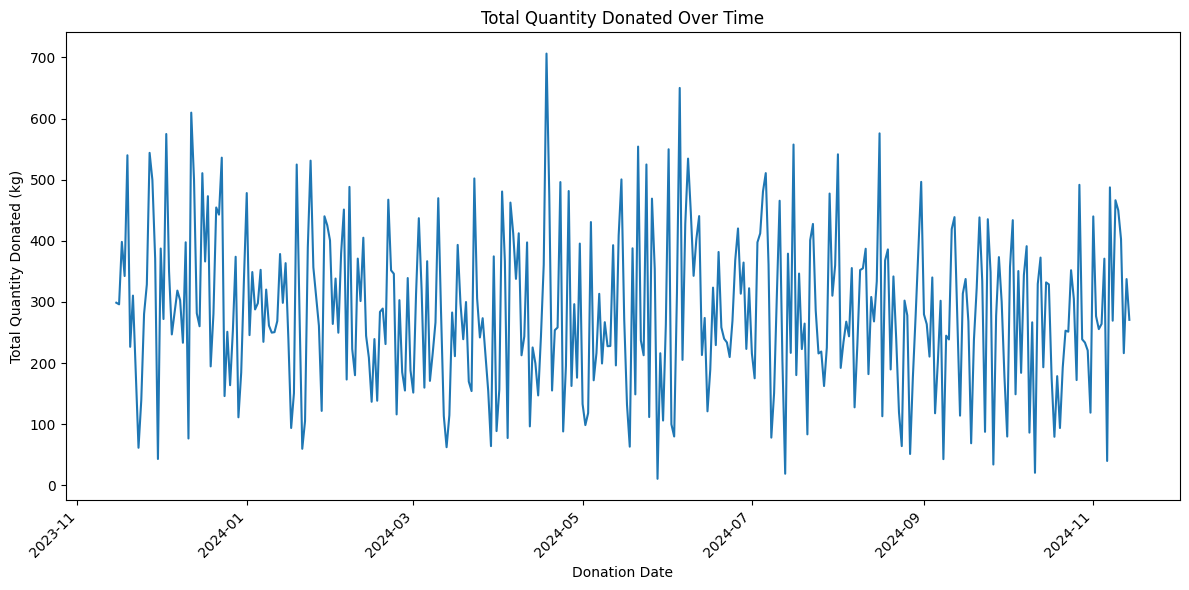

In [ ]:
# Calculate the line chart data
line_chart_data = df.groupby('Donation Date')['Quantity (kg)'].sum()
# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(line_chart_data.index, line_chart_data.values)
plt.xlabel('Donation Date')
plt.ylabel('Total Quantity Donated (kg)')
plt.title('Total Quantity Donated Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
# Assuming 'df' is your DataFrame and 'line_chart_data' is calculated as in your code
line_chart_data = df.groupby('Donation Date')['Quantity (kg)'].sum()
# Create the interactive line chart using Plotly Express
fig = px.line(x=line_chart_data.index, y=line_chart_data.values,
              labels={'x': 'Donation Date', 'y': 'Total Quantity Donated (kg)'},
              title='Total Quantity Donated Over Time')
# Customize the layout (optional)
fig.update_xaxes(title_text='Donation Date', tickangle=45)
fig.update_yaxes(title_text='Total Quantity Donated (kg)')
fig.update_layout(title_x=0.5) # center the title

fig.show()

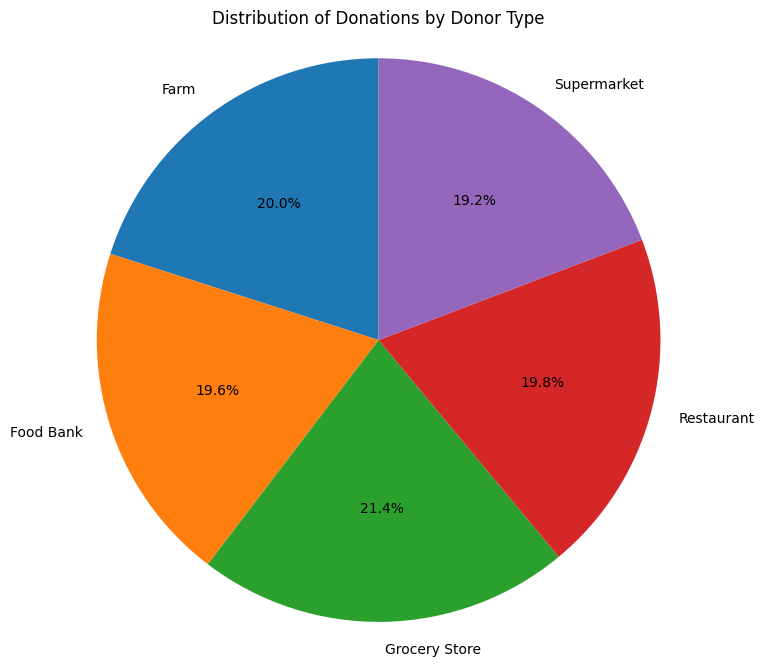

In [ ]:
import matplotlib.pyplot as plt
# Calculate the quantity donated by each donor type
donor_type_counts = df.groupby('Donor Type')['Quantity (kg)'].sum()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(donor_type_counts, labels=donor_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Donations by Donor Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

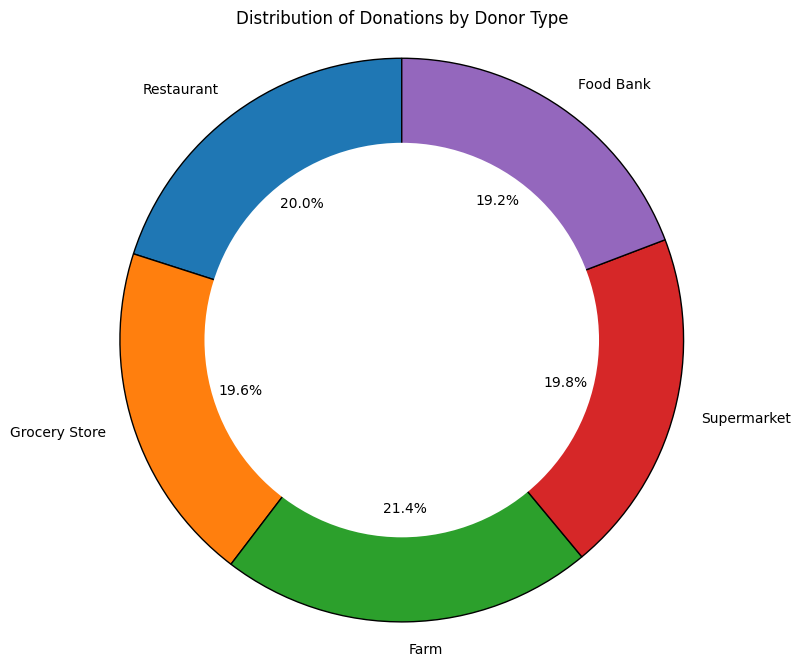

In [ ]:
donor_types = ['Restaurant', 'Grocery Store', 'Farm', 'Supermarket', 'Food Bank']
quantities = donor_type_counts
# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(quantities, labels=donor_types, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
# Create a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Donations by Donor Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import plotly.graph_objects as go
donor_type_counts = df.groupby('Donor Type')['Quantity (kg)'].sum()
donor_types = donor_type_counts.index
quantities = donor_type_counts.values

fig = go.Figure(data=[go.Pie(labels=donor_types, values=quantities, hole=.3)])
fig.update_layout(title_text="Interactive Donut Chart of Donations by Donor Type")
fig.show()

In [ ]:
df.head()

,Donor Name,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,Patel-Fisher,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4,3,2024,6,6
1,Mccoy LLC,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8,3,2024,1,25
2,Peterson-Harris,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
3,Nelson and Sons,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3,6,2024,2,25
4,Bell Ltd,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8,1,2024,6,25


In [ ]:
df = df.drop('Donor Name', axis=1)

In [ ]:
df.head()

,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,Dairy,38.45,Grahamburgh,2024-06-06,Drone,Restaurant,9,1.4,3,2024,6,6
1,Grains,39.92,North Amyberg,2024-01-25,Truck,Restaurant,9,0.8,3,2024,1,25
2,Grains,41.92,Carlosport,2023-12-18,Drone,Restaurant,5,1.3,0,2023,12,18
3,Meat,40.73,Johnsonchester,2024-02-25,Walk,Food Bank,6,2.3,6,2024,2,25
4,Grains,41.10,North Meganmouth,2024-06-25,Walk,Grocery Store,3,0.8,1,2024,6,25


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Iterate through each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Food Type,Quantity (kg),Location,Donation Date,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,2,38.45,457,2024-06-06,1,3,9,1.4,3,2024,6,6
1,5,39.92,1056,2024-01-25,2,3,9,0.8,3,2024,1,25
2,5,41.92,123,2023-12-18,1,3,5,1.3,0,2023,12,18
3,6,40.73,565,2024-02-25,4,1,6,2.3,6,2024,2,25
4,5,41.10,1147,2024-06-25,4,2,3,0.8,1,2024,6,25


In [ ]:
df.columns

Index(['Food Type', 'Quantity (kg)', 'Location', 'Donation Date',
       'Transport Mode', 'Donor Type', 'Donation Frequency (per month)',
       'Average Donation Duration (hours)', 'Day of Week', 'Year', 'Month',
       'Day'],
      dtype='object')

In [ ]:
y = df['Quantity (kg)']
y

,Quantity (kg)
0,38.45
1,39.92
2,41.92
3,40.73
4,41.10
...,...
1995,84.32
1996,7.01
1997,24.69
1998,66.75


In [ ]:
X = df.drop(['Quantity (kg)','Donation Date'], axis = 1)

In [ ]:
X

,Food Type,Location,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,2,457,1,3,9,1.4,3,2024,6,6
1,5,1056,2,3,9,0.8,3,2024,1,25
2,5,123,1,3,5,1.3,0,2023,12,18
3,6,565,4,1,6,2.3,6,2024,2,25
4,5,1147,4,2,3,0.8,1,2024,6,25
...,...,...,...,...,...,...,...,...,...,...
1995,4,362,4,1,9,2.3,4,2024,1,19
1996,8,84,4,4,1,1.8,1,2024,9,17
1997,0,1346,2,4,6,1.1,5,2023,12,23
1998,2,1517,3,3,3,2.8,5,2023,12,9


In [ ]:
X_new.shape

(2000, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [ ]:
#reg = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

0.8427246709570215

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 874.1969952679849
R-squared: -0.1975016795470752


In [ ]:
df['Location']

,Location
0,457
1,1056
2,123
3,565
4,1147
...,...
1995,362
1996,84
1997,1346
1998,1517


In [ ]:
new_df = pd.read_csv('/content/generated_food_donation_data.csv')

In [ ]:
new_df.iloc[84]['Location']

'Knappmouth'

In [ ]:
rf.predict(pd.DataFrame(columns=X_test.columns, data=np.array([84,'1.9','4']).reshape(1,3)))

array([55.9618])

The model`s accuracy is not good at all. So we have to try following things to improve the accuracy.

1**. Selecting Significant Features**

We have included all the features, there might be a posiibility that all the features are not significant.
(Manual feature selection, using RFE, BORUTA packages).


2 **Experiment with different algorithms**:
Other algorithms can be used to train the model, as they might overcome some drawbacks of Linear Regression Model.

We will check the relationship of every feature with 'Quantity ('KG')' Column to check if there is any impact on X changes and there is change in y.


------------------------------------------
Selecting Significant Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100))

In [ ]:
X

,Food Type,Location,Transport Mode,Donor Type,Donation Frequency (per month),Average Donation Duration (hours),Day of Week,Year,Month,Day
0,2,457,1,3,9,1.4,3,2024,6,6
1,5,1056,2,3,9,0.8,3,2024,1,25
2,5,123,1,3,5,1.3,0,2023,12,18
3,6,565,4,1,6,2.3,6,2024,2,25
4,5,1147,4,2,3,0.8,1,2024,6,25
...,...,...,...,...,...,...,...,...,...,...
1995,4,362,4,1,9,2.3,4,2024,1,19
1996,8,84,4,4,1,1.8,1,2024,9,17
1997,0,1346,2,4,6,1.1,5,2023,12,23
1998,2,1517,3,3,3,2.8,5,2023,12,9


In [ ]:
select.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor())

In [ ]:
select.transform(X)

array([[4.570e+02, 1.400e+00, 6.000e+00],
       [1.056e+03, 8.000e-01, 2.500e+01],
       [1.230e+02, 1.300e+00, 1.800e+01],
       ...,
       [1.346e+03, 1.100e+00, 2.300e+01],
       [1.517e+03, 2.800e+00, 9.000e+00],
       [1.114e+03, 2.100e+00, 2.000e+01]])

In [ ]:
y

,Quantity (kg)
0,38.45
1,39.92
2,41.92
3,40.73
4,41.10
...,...
1995,84.32
1996,7.01
1997,24.69
1998,66.75


In [ ]:
select.get_support()

array([False,  True, False, False, False,  True, False, False, False,
        True])

In [ ]:
variable_imp = pd.DataFrame({"Important": list(select.get_support()), "Feature_Name": list(X.columns)})

In [ ]:
variable_imp

,Important,Feature_Name
0,False,Food Type
1,True,Location
2,False,Transport Mode
3,False,Donor Type
4,False,Donation Frequency (per month)
5,True,Average Donation Duration (hours)
6,False,Day of Week
7,False,Year
8,False,Month
9,True,Day


In [ ]:
#Exercise: Do some research about ReadMe file on Github and make one for your food wastage project.